## Dataanalyse

### Konceptuel Projektbeskrivelse:

Vi har valgt at arbejde med et dataset, der indeholder scores fra tre eksamener samt en række personlige, sociale og økonomiske faktorer, der potentielt har indflydelse på eksamensresultaterne. Vores mål er at udføre en dybdegående dataanalyse og anvende maskinlæringsmetoder til at forudsige eksamensresultaterne baseret på de tilgængelige faktorer. Dette projekt vil give os mulighed for at udforske, hvordan forskellige variable påvirker studerendes præstationer og identificere vigtige faktorer, der kan forudsige eksamensresultaterne.

### Beskrivelse af Datasættet:

Vores valgte datasæt er en fiktiv samling af data, der indeholder oplysninger om 1000 studerende. Dette datasæt indeholder følgende variable:

1. gender: Angiver kønnet på hver studerende ("male" eller "female").

2. race/ethnicity: Angiver den etniske baggrund for hver studerende (group A, B, C, D eller F).

3. parental level of education: Angiver uddannelsesniveauet for den studerendes forældre (f.eks. "some college" eller "master's degree").

4. lunch: Angiver typen af frokost, som hver studerende får (f.eks. "standard" eller "free/reduced").

5. test preparation course: Indikerer, om den studerende har taget et forberedelseskursus til testen ("completed" eller "none").

6. math score: Angiver karakteren i matematik for hver studerende (som et numerisk resultat).

7. reading score: Angiver karakteren i læsning for hver studerende (som et numerisk resultat).

8. writing score: Angiver karakteren i skrivning for hver studerende (som et numerisk resultat).

### Beskrivelse af Data:

Datasættet indeholder oplysninger om 1000 studerende. Det indeholder de nævnte features (køn, race/etnicitet, forældres uddannelsesniveau, frokosttype, testforberedelseskursus) samt karakterer i matematik, læsning og skrivning.

### Anvendelse af Datasættet:

Vi har til hensigt at anvende dette datasæt til flere formål i løbet af vores projekt:

Descriptive Data Analysis: Vi vil udføre en detaljeret deskriptiv dataanalyse for at forstå fordelingen af hver variabel, udforske eventuelle sammenhænge mellem dem og identificere mulige mønstre i data.

Maskinlæring: Vi vil eksperimentere med forskellige maskinlæringsmodeller, såsom regressionsmodeller eller klassifikationsmodeller, for at forudsige eksamensresultaterne baseret på de tilgængelige faktorer. Dette vil give os mulighed for at evaluere, hvilke faktorer der er mest indflydelsesrige.

Visualisering: Vi vil skabe visuelle repræsentationer af data for at hjælpe med at forklare resultaterne.

Samlet set vil dette projekt give os mulighed for at anvende nogle af de maskinlæringsmodeller vi lærer i kurset, på et reelt dataset og udforske, hvordan forskellige faktorer kan påvirke studerendes eksamensresultater.

In [5]:
import pandas as pd

data = pd.read_csv('../../exams.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,associate's degree,standard,completed,70,88,86
1,female,group D,high school,free/reduced,completed,52,70,70
2,male,group B,high school,standard,none,72,69,63
3,male,group D,bachelor's degree,standard,completed,84,78,82
4,male,group E,some college,standard,completed,80,74,75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


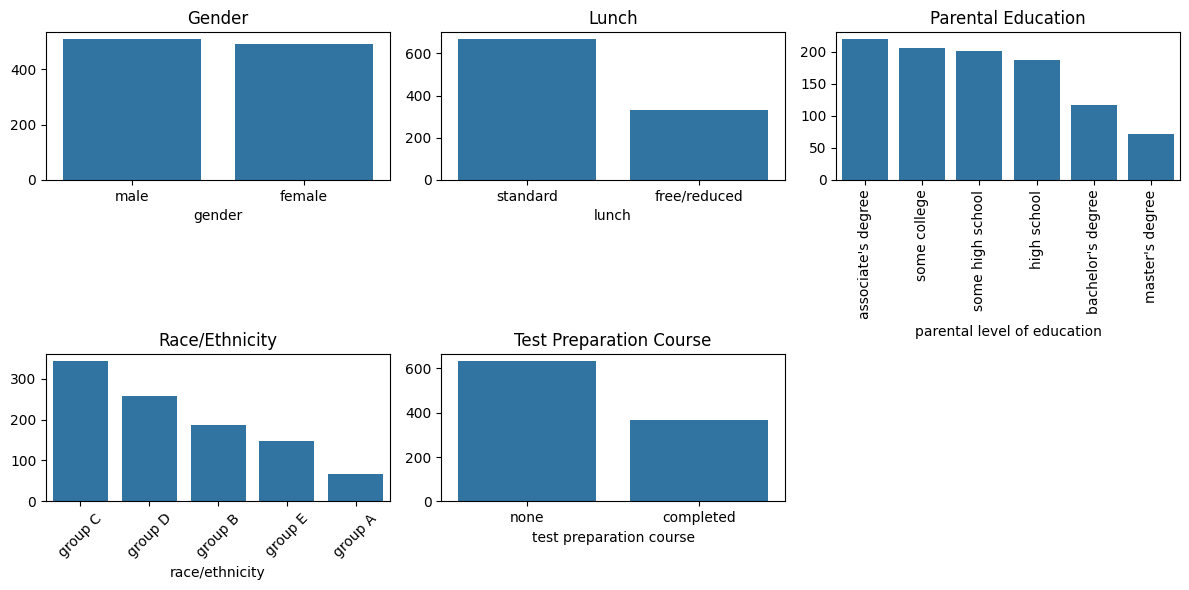

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
gender_counts = data["gender"].value_counts()
lunch_counts = data["lunch"].value_counts()
parental_education_counts = data["parental level of education"].value_counts()
race_ethnicity_counts = data["race/ethnicity"].value_counts()
test_preparation_counts = data["test preparation course"].value_counts()

# Søjlediagrammer
plt.figure(figsize=(12, 6))

# Gender
plt.subplot(231)
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title("Gender")

# Lunch
plt.subplot(232)
sns.barplot(x=lunch_counts.index, y=lunch_counts.values)
plt.title("Lunch")

# Parental Level of Education
plt.subplot(233)
sns.barplot(x=parental_education_counts.index, y=parental_education_counts.values)
plt.xticks(rotation=90)
plt.title("Parental Education")

# Race/Ethnicity
plt.subplot(234)
sns.barplot(x=race_ethnicity_counts.index, y=race_ethnicity_counts.values)
plt.xticks(rotation=45)
plt.title("Race/Ethnicity")

# Test Preparation Course
plt.subplot(235)
sns.barplot(x=test_preparation_counts.index, y=test_preparation_counts.values)
plt.title("Test Preparation Course")

plt.tight_layout()
plt.show()


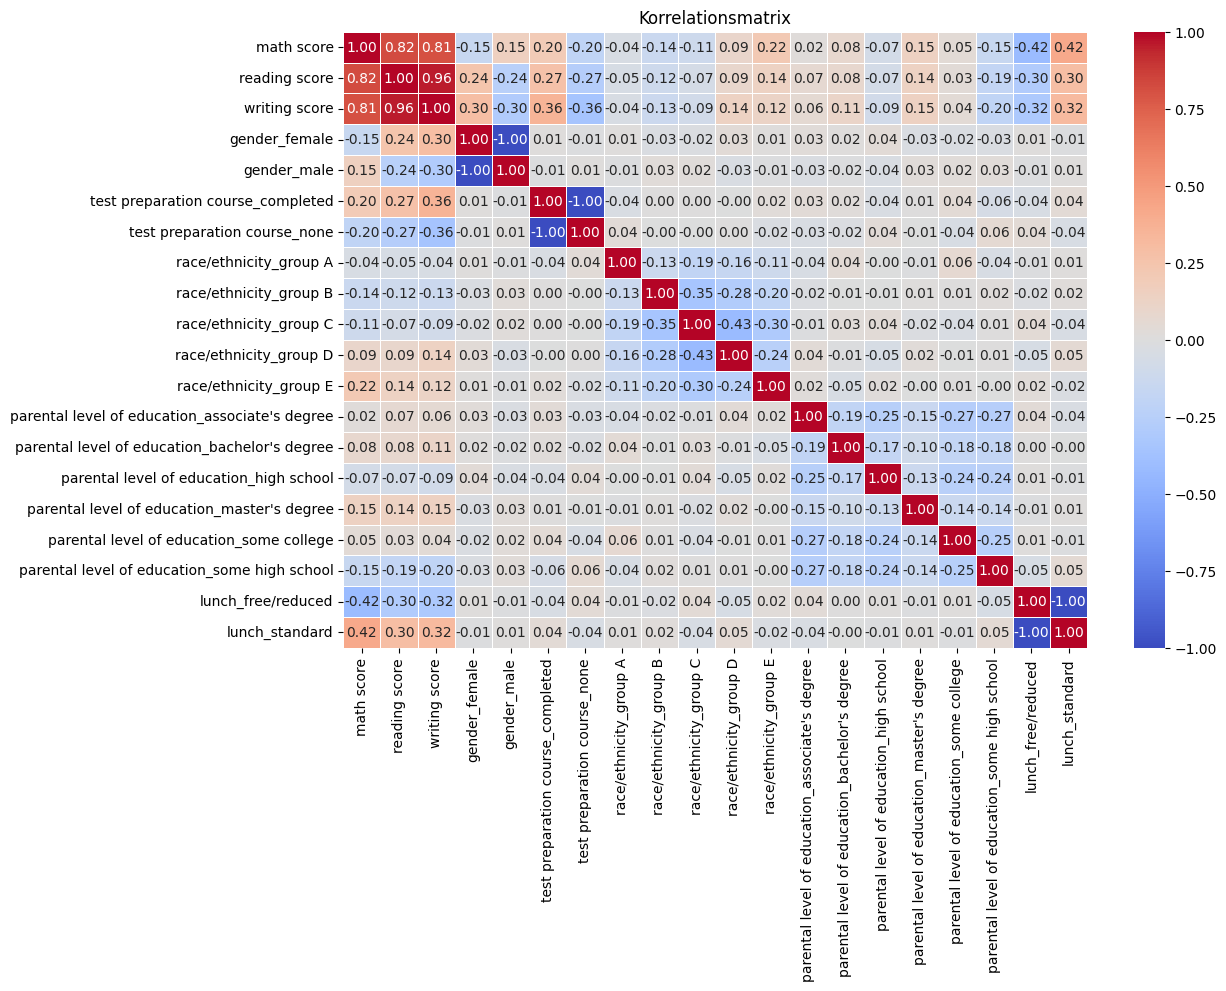

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Omdan kategoriske variabler til numeriske ved hjælp af one-hot encoding
data_encoded = pd.get_dummies(data, columns=["gender", "test preparation course", "race/ethnicity", "parental level of education", "lunch"])

# Opret en korrelationsmatrix
correlation_matrix = data_encoded.corr()

# Lav en heatmap for at visualisere korrelationen med to decimaler
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korrelationsmatrix")

plt.show()


C:\Users\ahoeg\AppData\Local\Temp\ipykernel_24672\3920060945.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="lunch", y="math score", palette="Set2")


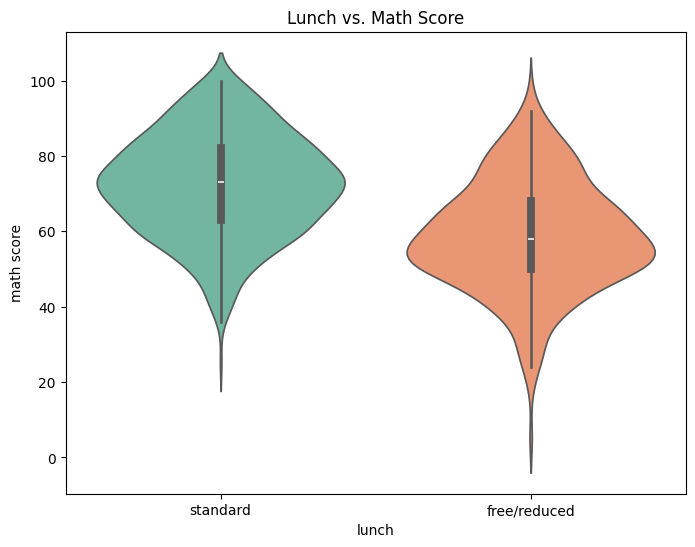

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for Lunch vs. Math Score
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x="lunch", y="math score", palette="Set2")
plt.title("Lunch vs. Math Score")
plt.show()
